In [1]:
import os
import numpy as np
import pandas as pd
import flopy

from disu2disv import disu2disv

In [2]:
# import the grid from the Algomesh genertared DISU

disu_ws = os.path.join('algomesh','voronoi')
disu_file = os.path.join(disu_ws,'m5_mf6.disu')

nvert, vertices, cell2d, ncpl, area = disu2disv(disu_file, workspace=disu_ws)

In [3]:
# get the spatial refernce from the model
model_ws = os.path.join('new_model','voronoi')
model_name = 'test'
perlen = 1
nstp = 1

# create simulation
sim = flopy.mf6.MFSimulation(sim_name=model_name, version='mf6', exe_name='mf6', 
                             sim_ws=model_ws)

# create tdis package
tdis_rc = [(0.0, 1, 1.0)]

tdis = flopy.mf6.ModflowTdis(sim, pname='tdis', time_units='DAYS', nper=len(tdis_rc),
                             perioddata=tdis_rc)

# create gwf model
gwf = flopy.mf6.ModflowGwf(sim, modelname=model_name,
                           model_nam_file='{}.nam'.format(model_name))#,model_rel_path='modflow6',)
gwf.name_file.save_flows = True

# create iterative model solution and register the gwf model with it
ims = flopy.mf6.ModflowIms(sim, pname='ims', print_option='SUMMARY', 
                           complexity='SIMPLE', outer_hclose=1.e-5, 
                           outer_maximum=100, under_relaxation='NONE', 
                           inner_maximum=100, inner_hclose=1.e-6, 
                           rcloserecord=0.1, linear_acceleration='BICGSTAB', 
                           scaling_method='NONE', reordering_method='NONE', 
                           relaxation_factor=0.99)
sim.register_ims_package(ims, [gwf.name])

# disv
# nvert, vertices, cell2d, ncpl
dis = flopy.mf6.ModflowGwfdisv(model=gwf, nlay=1, ncpl=ncpl, nvert=nvert, top=100, botm=0, vertices=vertices, cell2d=cell2d)



[<AxesSubplot:title={'center':'botm layer 1'}>]

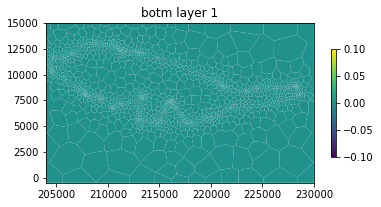

In [4]:
dis.plot()